In [15]:
import pandas as pd
df = pd.read_csv("loan_data_set.csv")
print (df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [16]:
from sklearn.preprocessing import StandardScaler
dframe= pd.read_csv("loan_data_set.csv")
dframe.LoanAmount.fillna(dframe.LoanAmount.median(),inplace=True)#by median
dframe.Loan_Amount_Term.fillna(dframe.Loan_Amount_Term.median(),inplace=True)#by median
import matplotlib.pyplot as plt

In [17]:
features_for_pca=['ApplicantIncome','LoanAmount','']

In [18]:
# Separating out the features
x = dframe.loc[:, features_for_pca].values
#print (x)
y = dframe.loc[:,['Loan_Status']].values
#print (y)
x = StandardScaler().fit_transform(x)
#print (x)

/Users/cluelessidiot/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/cluelessidiot/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/cluelessidiot/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#print (principalDf)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [13]:
finalDf = pd.concat([principalDf, dframe[['Loan_Status']]], axis = 1)
#print (finalDf)

NameError: name 'principalDf' is not defined

NameError: name 'finalDf' is not defined

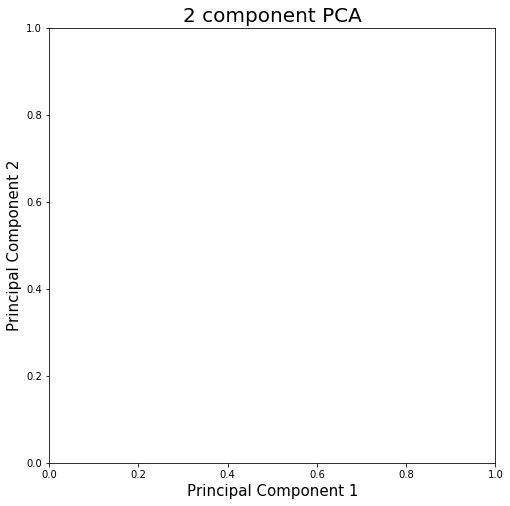

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Y','N']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Loan_Status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()